In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [356]:
df=pd.read_csv('Flight_Price.csv')

In [357]:
df.head()

,Unnamed: 0,Airline,Date_enq,Date_journey,Source,Departure,Destination,Arrival,Duration,Stops,Route,Price
0,0,AirAsia,31/10/2021,31/10/20,New Delhi,21:25,Mumbai,06:45,9.333333,1,Bengaluru,5953
1,1,AirAsia,31/10/2021,31/10/20,New Delhi,18:35,Mumbai,06:45,12.166667,1,Bengaluru,5953
2,2,Go First,31/10/2021,31/10/20,New Delhi,18:05,Mumbai,20:25,2.333333,0,NaN,5954
3,3,Go First,31/10/2021,31/10/20,New Delhi,19:40,Mumbai,21:55,2.250000,0,NaN,5954
4,4,Go First,31/10/2021,31/10/20,New Delhi,21:00,Mumbai,23:15,2.250000,0,NaN,5954


In [358]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [359]:
df.head()

,Airline,Date_enq,Date_journey,Source,Departure,Destination,Arrival,Duration,Stops,Route,Price
0,AirAsia,31/10/2021,31/10/20,New Delhi,21:25,Mumbai,06:45,9.333333,1,Bengaluru,5953
1,AirAsia,31/10/2021,31/10/20,New Delhi,18:35,Mumbai,06:45,12.166667,1,Bengaluru,5953
2,Go First,31/10/2021,31/10/20,New Delhi,18:05,Mumbai,20:25,2.333333,0,NaN,5954
3,Go First,31/10/2021,31/10/20,New Delhi,19:40,Mumbai,21:55,2.250000,0,NaN,5954
4,Go First,31/10/2021,31/10/20,New Delhi,21:00,Mumbai,23:15,2.250000,0,NaN,5954


In [360]:
df.shape

(97759, 11)

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97759 entries, 0 to 97758
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       97759 non-null  object 
 1   Date_enq      97759 non-null  object 
 2   Date_journey  97759 non-null  object 
 3   Source        97759 non-null  object 
 4   Departure     97759 non-null  object 
 5   Destination   97759 non-null  object 
 6   Arrival       97759 non-null  object 
 7   Duration      97759 non-null  float64
 8   Stops         97759 non-null  int64  
 9   Route         37158 non-null  object 
 10  Price         97759 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 8.2+ MB


In [362]:
df.describe()

,Duration,Stops,Price
count,97759.000000,97759.000000,97759.000000
mean,4.152952,0.389376,4883.745701
std,3.555936,0.506887,2404.800210
min,1.016667,0.000000,1443.000000
25%,2.033333,0.000000,3081.000000
50%,2.583333,0.000000,4453.000000
75%,5.916667,1.000000,6080.000000
max,55.916667,3.000000,30202.000000


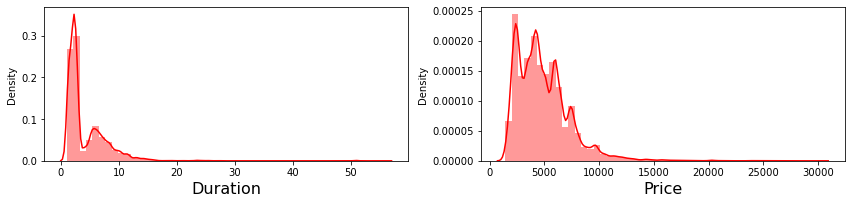

In [363]:
#There are some outliers in the dataset. Lets try to remove them
plt.figure(figsize=(30,30))
plotnumber=1
int_col=['Duration','Price']
for col in int_col:
    if plotnumber<=2:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(df[col],color='red')
        plt.xlabel(col,fontsize=16)
        
    plotnumber+=1
plt.show()

In [364]:
from scipy import stats
print("Number of Data Before Outlier Removal:",df.shape[0])
z=np.abs(stats.zscore(df['Duration']))
index=(np.where(z>2)[0])
df=df.drop(df.index[index])
print("Number of Data After Outlier Removal:",df.shape[0])

Number of Data Before Outlier Removal: 97759
Number of Data After Outlier Removal: 94095


In [365]:
print("Number of Data Before Outlier Removal:",df.shape[0])
z=np.abs(stats.zscore(df['Price']))
index=(np.where(z>2)[0])
df=df.drop(df.index[index])
print("Number of Data After Outlier Removal:",df.shape[0])

Number of Data Before Outlier Removal: 94095
Number of Data After Outlier Removal: 90517


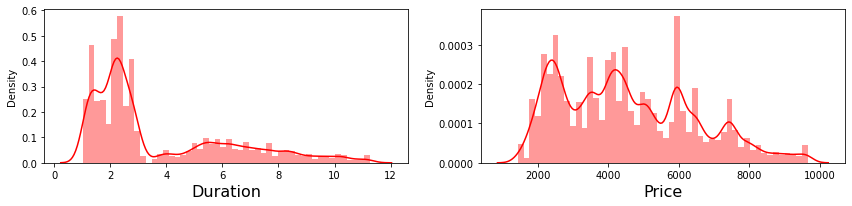

In [366]:
plt.figure(figsize=(30,30))
plotnumber=1
int_col=['Duration','Price']
for col in int_col:
    if plotnumber<=2:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(df[col],color='red')
        plt.xlabel(col,fontsize=16)
        
    plotnumber+=1
plt.show()

The data looks somewhat like normal

In [367]:
df.head()

,Airline,Date_enq,Date_journey,Source,Departure,Destination,Arrival,Duration,Stops,Route,Price
0,AirAsia,31/10/2021,31/10/20,New Delhi,21:25,Mumbai,06:45,9.333333,1,Bengaluru,5953
2,Go First,31/10/2021,31/10/20,New Delhi,18:05,Mumbai,20:25,2.333333,0,NaN,5954
3,Go First,31/10/2021,31/10/20,New Delhi,19:40,Mumbai,21:55,2.250000,0,NaN,5954
4,Go First,31/10/2021,31/10/20,New Delhi,21:00,Mumbai,23:15,2.250000,0,NaN,5954
5,Go First,31/10/2021,31/10/20,New Delhi,22:30,Mumbai,00:40,2.166667,0,NaN,5954


In [368]:
df.isna().sum()

Airline             0
Date_enq            0
Date_journey        0
Source              0
Departure           0
Destination         0
Arrival             0
Duration            0
Stops               0
Route           58994
Price               0
dtype: int64

In [369]:
df['Stops'].value_counts()

0    58994
1    30971
2      547
3        5
Name: Stops, dtype: int64

Out of 90517 records there are only 547 flights which have 2 stops and 5 flights which have 3 stops. Lets remove these records so that we can do a better analysis for flights and have maximum 1 stop. 

In [370]:
df=df[df['Stops']!=2]
df=df[df['Stops']!=3]
df['Stops'].value_counts()

0    58994
1    30971
Name: Stops, dtype: int64

In [371]:
df.shape

(89965, 11)

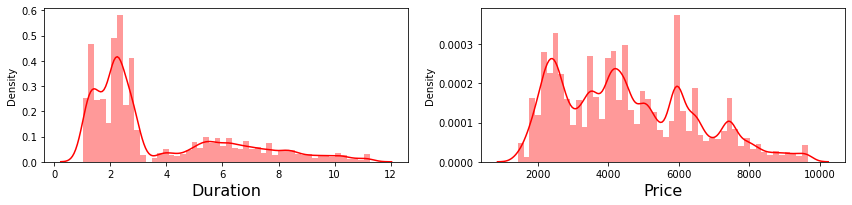

In [372]:
plt.figure(figsize=(30,30))
plotnumber=1
int_col=['Duration','Price']
for col in int_col:
    if plotnumber<=2:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(df[col],color='red')
        plt.xlabel(col,fontsize=16)
        
    plotnumber+=1
plt.show()

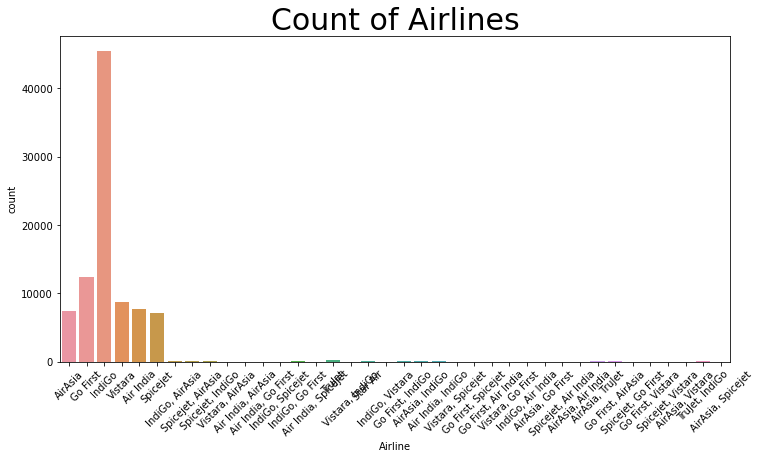

In [373]:
plt.figure(figsize=(12,6))
sns.countplot(df['Airline'])
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=45)
plt.show()

In [374]:
#Flights with multiple stops have more than one airlines. We will separate them into Airline_1, Airline_2

df['Airline_1']=df['Airline'].str.split(',').str[0]
df['Airline_2']=df['Airline'].str.split(',').str[1]

df['Airline_1'].fillna("None",inplace=True)
df['Airline_2'].fillna("None",inplace=True)

df.drop(['Airline'],axis=1,inplace=True)

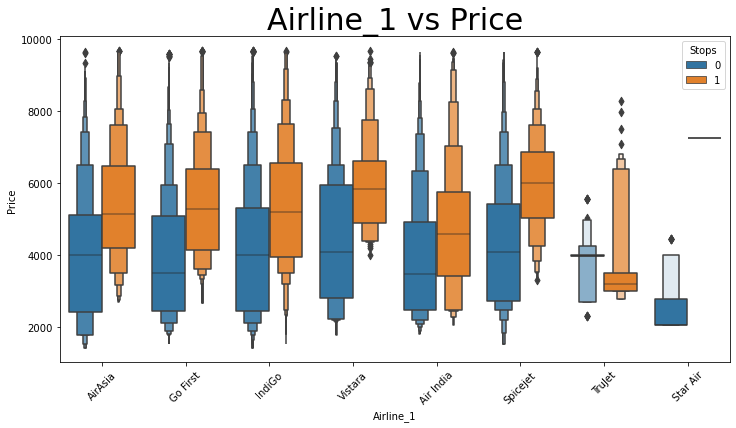

In [375]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Airline_1'], df['Price'],hue=df['Stops'])
plt.title('Airline_1 vs Price', size=30)
plt.xticks(rotation=45)
plt.show()

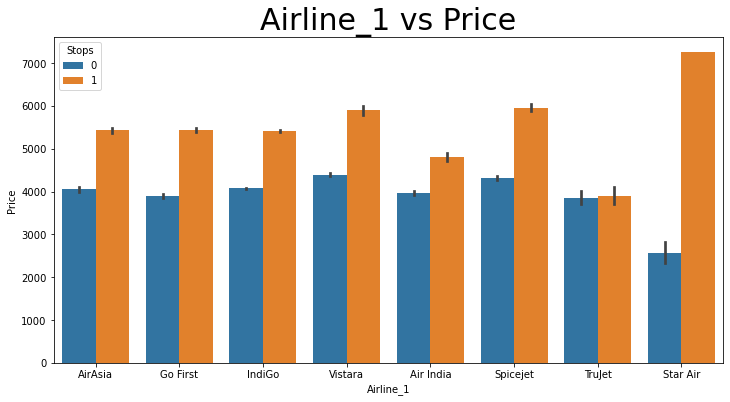

In [376]:
plt.figure(figsize=(12,6))
sns.barplot(df['Airline_1'], df['Price'],hue=df['Stops'])
plt.title('Airline_1 vs Price', size=30)
plt.show()

Direct Flight: Vistara has highest price followed by Spicejet and Indigo Star Air has least price
1 Stop: Star Air has highest price followed by Vistara. Trujet has least price

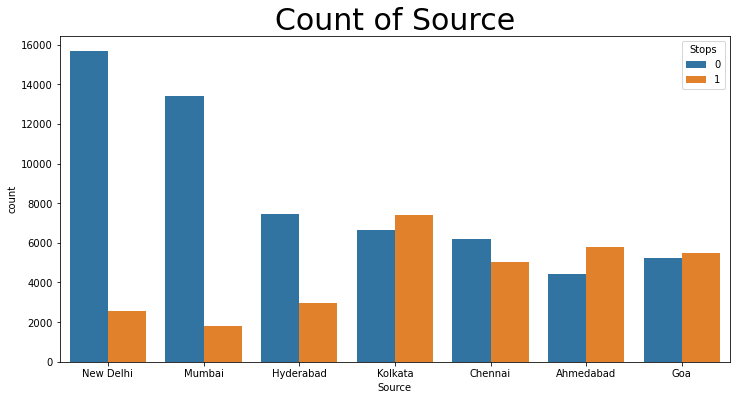

In [377]:
plt.figure(figsize=(12,6))
sns.countplot(df['Source'],hue=df['Stops'])
plt.title('Count of Source', size=30)
plt.show()

Direct Flight: There are more number of direct flights from New Delhi followed by Mumbai and Hyderabad
1 Stop: There are more number of connecting flights from Kolkata followed by Ahmedabad and Goa

<Figure size 720x144 with 0 Axes>

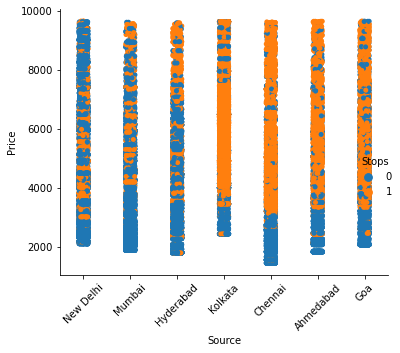

In [378]:
plt.figure(figsize=(10,2))
plot= sns.catplot(x="Source", y="Price", hue="Stops", data=df)
plot.set_xticklabels(rotation=45)
plt.tight_layout()

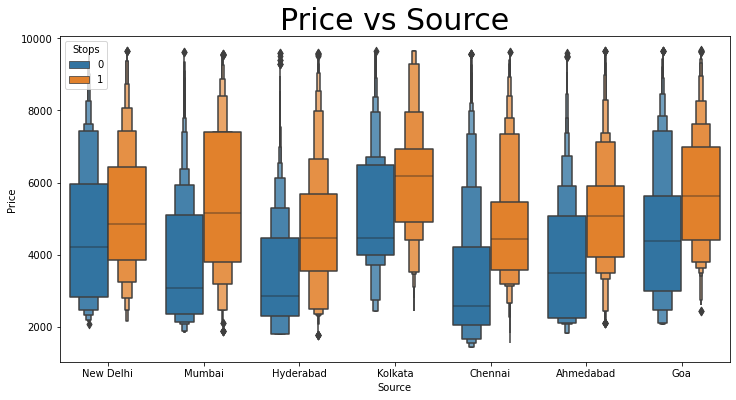

In [379]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Source'], df['Price'],hue=df['Stops'])
plt.title('Price vs Source', size=30)
plt.show()

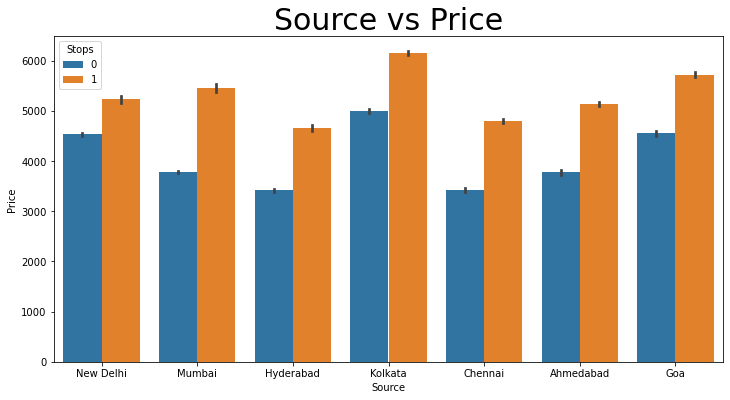

In [380]:
plt.figure(figsize=(12,6))
sns.barplot(df['Source'], df['Price'],hue=df['Stops'])
plt.title('Source vs Price', size=30)
plt.show()

Direct Flight: The flight price is highest from Kolkata followed by Goa and New Delhi
1 Stop: The flight price is highest from Kolkata followed by Mumbai and Goa

In [381]:
# Separating date of journey into journey day and journey month
df['Enq_day']=df['Date_enq'].str.split('/').str[0].astype(int)
df['Enq_month']=df['Date_enq'].str.split('/').str[1].astype(int)

df['Journey_day']=df['Date_journey'].str.split('/').str[0].astype(int)
df['Journey_month']=df['Date_journey'].str.split('/').str[1].astype(int)

In [382]:
df.head()

,Date_enq,Date_journey,Source,Departure,Destination,Arrival,Duration,Stops,Route,Price,Airline_1,Airline_2,Enq_day,Enq_month,Journey_day,Journey_month
0,31/10/2021,31/10/20,New Delhi,21:25,Mumbai,06:45,9.333333,1,Bengaluru,5953,AirAsia,None,31,10,31,10
2,31/10/2021,31/10/20,New Delhi,18:05,Mumbai,20:25,2.333333,0,NaN,5954,Go First,None,31,10,31,10
3,31/10/2021,31/10/20,New Delhi,19:40,Mumbai,21:55,2.250000,0,NaN,5954,Go First,None,31,10,31,10
4,31/10/2021,31/10/20,New Delhi,21:00,Mumbai,23:15,2.250000,0,NaN,5954,Go First,None,31,10,31,10
5,31/10/2021,31/10/20,New Delhi,22:30,Mumbai,00:40,2.166667,0,NaN,5954,Go First,None,31,10,31,10


Calculation of day of the week (31/10/21:Sunday)
Monday=1
Tuesday=2
Wednesday=3
Thursday=4
Friday=5
Saturday=6
Sunday=7

In [383]:
dd=df['Journey_day'].tolist()
mm=df['Journey_month'].tolist()

day_of_week=[0]*len(dd)

for i in range(len(dd)):
    if mm[i]==10:
        day_of_week[i]=7
        
    elif mm[i]==11:
        if dd[i]%7=='0':
            day_of_week[i]=7
        else:
            day_of_week[i]=dd[i]%7
    
    elif mm[i]==12:
        if dd[i]%7==6:
            day_of_week[i]=1
        elif dd[i]%7==0:
            day_of_week[i]=2
        else:
            day_of_week[i]=dd[i]%7 + 2
    
    elif mm[i]==1:
        if dd[i]%7==0:
            day_of_week[i]=5
        if dd[i]%7<3:
            day_of_week[i]=dd[i]%7 + 5
        elif dd[i]%7>2:
            day_of_week[i]=dd[i]%7 - 2

In [384]:
df['Day_of_week']=day_of_week

In [385]:
df.head()

,Date_enq,Date_journey,Source,Departure,Destination,Arrival,Duration,Stops,Route,Price,Airline_1,Airline_2,Enq_day,Enq_month,Journey_day,Journey_month,Day_of_week
0,31/10/2021,31/10/20,New Delhi,21:25,Mumbai,06:45,9.333333,1,Bengaluru,5953,AirAsia,None,31,10,31,10,7
2,31/10/2021,31/10/20,New Delhi,18:05,Mumbai,20:25,2.333333,0,NaN,5954,Go First,None,31,10,31,10,7
3,31/10/2021,31/10/20,New Delhi,19:40,Mumbai,21:55,2.250000,0,NaN,5954,Go First,None,31,10,31,10,7
4,31/10/2021,31/10/20,New Delhi,21:00,Mumbai,23:15,2.250000,0,NaN,5954,Go First,None,31,10,31,10,7
5,31/10/2021,31/10/20,New Delhi,22:30,Mumbai,00:40,2.166667,0,NaN,5954,Go First,None,31,10,31,10,7


In [386]:
df.drop(["Date_journey","Date_enq"], axis = 1, inplace = True)
df.head()

,Source,Departure,Destination,Arrival,Duration,Stops,Route,Price,Airline_1,Airline_2,Enq_day,Enq_month,Journey_day,Journey_month,Day_of_week
0,New Delhi,21:25,Mumbai,06:45,9.333333,1,Bengaluru,5953,AirAsia,None,31,10,31,10,7
2,New Delhi,18:05,Mumbai,20:25,2.333333,0,NaN,5954,Go First,None,31,10,31,10,7
3,New Delhi,19:40,Mumbai,21:55,2.250000,0,NaN,5954,Go First,None,31,10,31,10,7
4,New Delhi,21:00,Mumbai,23:15,2.250000,0,NaN,5954,Go First,None,31,10,31,10,7
5,New Delhi,22:30,Mumbai,00:40,2.166667,0,NaN,5954,Go First,None,31,10,31,10,7


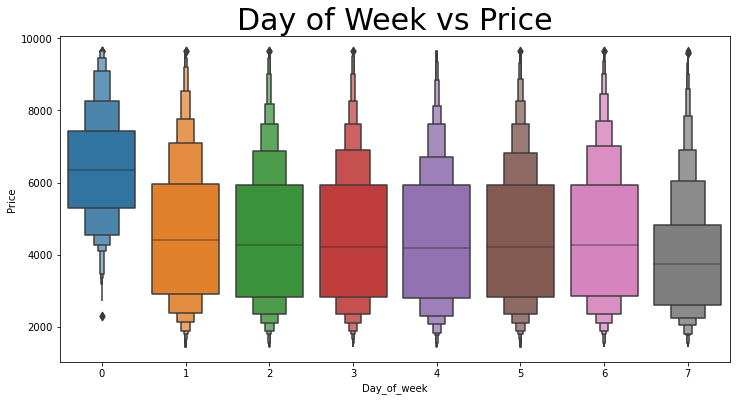

In [387]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Day_of_week'], df['Price'])
plt.title('Day of Week vs Price', size=30)
plt.show()

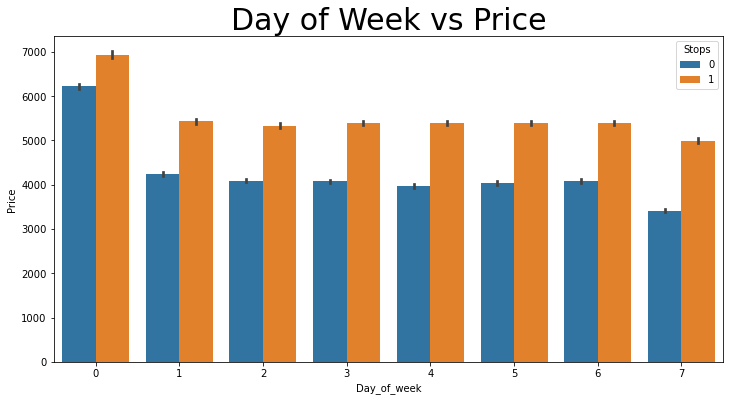

In [388]:
plt.figure(figsize=(12,6))
sns.barplot(df['Day_of_week'], df['Price'],hue=df['Stops'])
plt.title('Day of Week vs Price', size=30)
plt.show()

Flight Price is highest on Mondays and least on Sundays

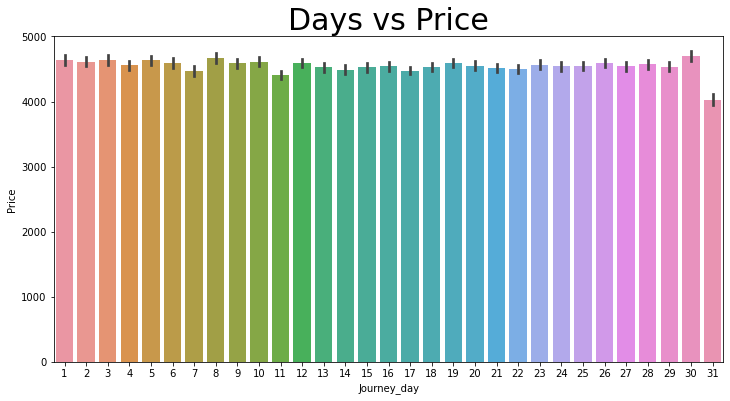

In [389]:
plt.figure(figsize=(12,6))
sns.barplot(df['Journey_day'], df['Price'])
plt.title('Days vs Price', size=30)
plt.show()

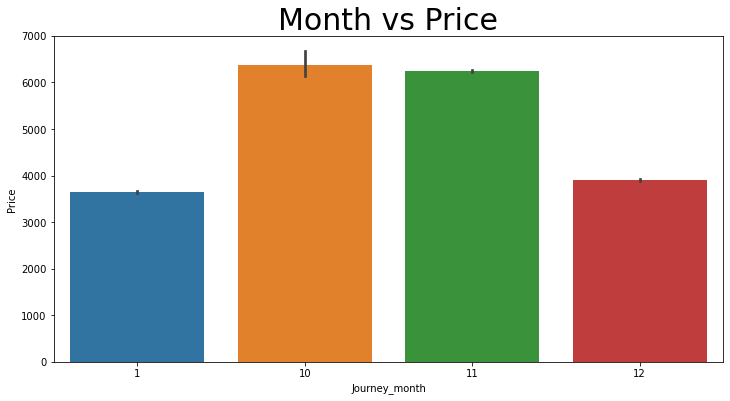

In [408]:
plt.figure(figsize=(12,6))
sns.barplot(df['Journey_month'], df['Price'])
plt.title('Month vs Price', size=30)
plt.show()

In [390]:
# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Departure"]).dt.hour

# Now we can drop Dep_Time as it is of no use
df.drop(["Departure"], axis = 1, inplace = True)

In [391]:
#lets find out departure period of day
bins = [-1, 3, 6, 9, 12, 16, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['dep_period_of_day'] = pd.cut(df.Dep_hour, bins, labels=names).astype(object)
df.drop(["Dep_hour"], axis = 1, inplace = True)
df['dep_period_of_day'].head()

0      night
2    evening
3    evening
4      night
5      night
Name: dep_period_of_day, dtype: object

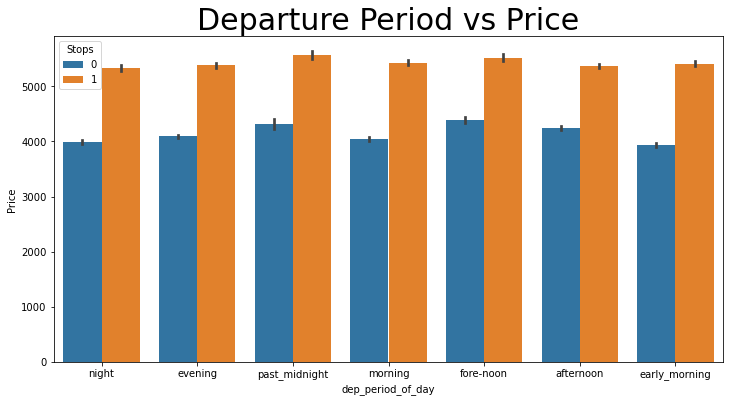

In [392]:
plt.figure(figsize=(12,6))
sns.barplot(df['dep_period_of_day'], df['Price'],hue=df['Stops'])
plt.title('Departure Period vs Price', size=30)
plt.show()

The price is higher for flights departing at forenoon followed by the flights which depart past midnight

In [393]:
# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival).dt.hour

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival"], axis = 1, inplace = True)

In [394]:
#lets find out departure period of day
bins = [-1, 3, 6, 9, 12, 16, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['arrival_period_of_day'] = pd.cut(df.Arrival_hour, bins, labels=names).astype(object)
df.drop(["Arrival_hour"], axis = 1, inplace = True)
df['arrival_period_of_day'].head()

0    early_morning
2          evening
3            night
4            night
5    past_midnight
Name: arrival_period_of_day, dtype: object

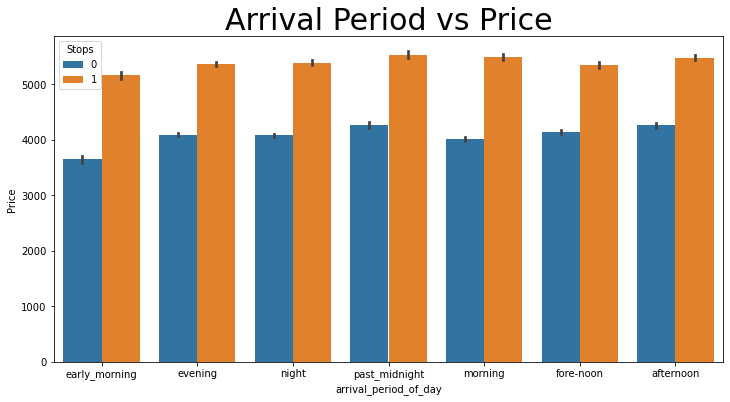

In [395]:
plt.figure(figsize=(12,6))
sns.barplot(df['arrival_period_of_day'], df['Price'],hue=df['Stops'])
plt.title('Arrival Period vs Price', size=30)
plt.show()

The flight prices are highest when the arrival time is past midnight followed by afternoon

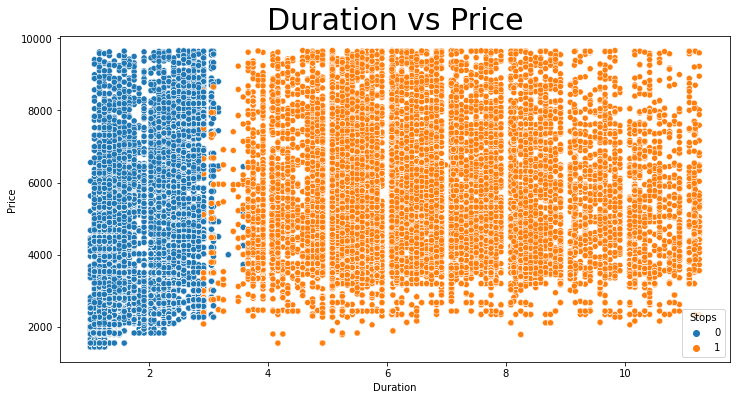

In [396]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['Duration'], df['Price'],hue=df['Stops'])
plt.title('Duration vs Price', size=30)
plt.show()

<Figure size 864x432 with 0 Axes>

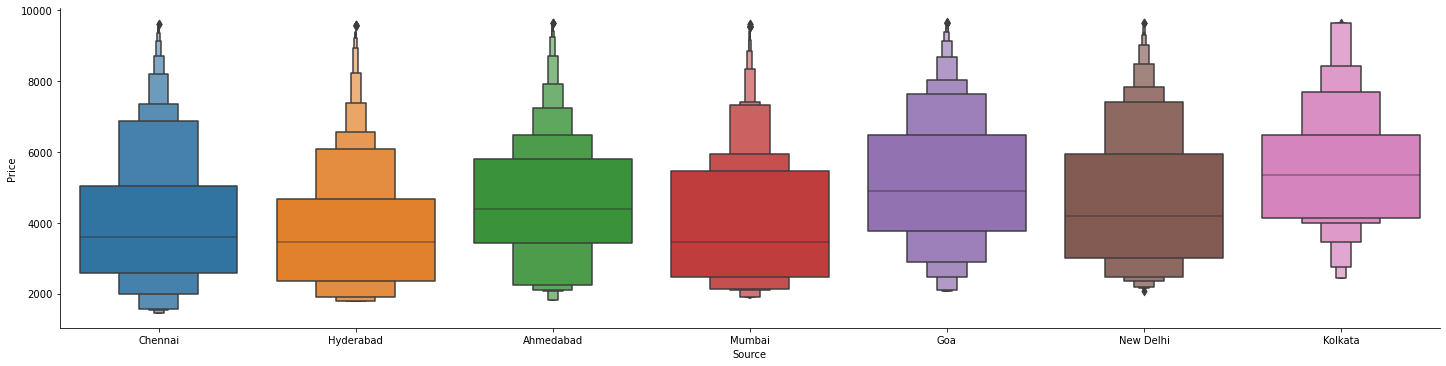

In [397]:
plt.figure(figsize=(12,6))
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = True), kind="boxen", height = 5, aspect = 4)
plt.show()

The fight prices are maximum from Goa and Kolkata least from Hyderabad.

<Figure size 864x432 with 0 Axes>

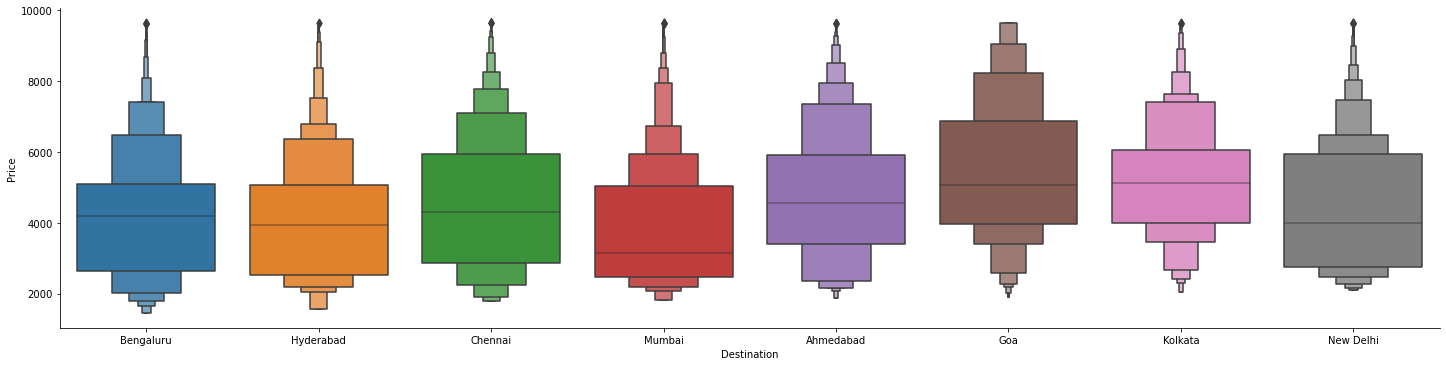

In [398]:
plt.figure(figsize=(12,6))
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = True), kind="boxen", height = 5, aspect = 4)
plt.show()

The flight prices are maximum for Goa and least for Bengaluru

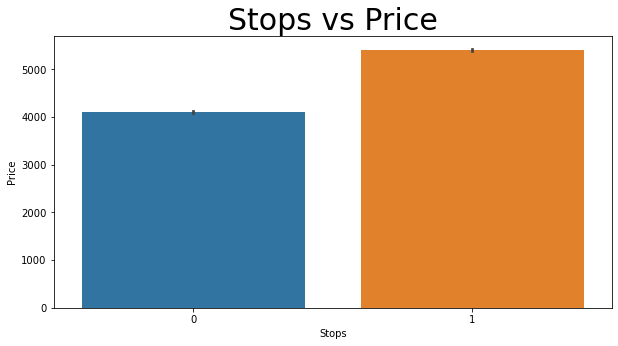

In [399]:
plt.figure(figsize=(10,5))
sns.barplot(df['Stops'], df['Price'])
plt.title('Stops vs Price', size=30)
plt.show()

In [400]:
df.head()

,Source,Destination,Duration,Stops,Route,Price,Airline_1,Airline_2,Enq_day,Enq_month,Journey_day,Journey_month,Day_of_week,dep_period_of_day,arrival_period_of_day
0,New Delhi,Mumbai,9.333333,1,Bengaluru,5953,AirAsia,None,31,10,31,10,7,night,early_morning
2,New Delhi,Mumbai,2.333333,0,NaN,5954,Go First,None,31,10,31,10,7,evening,evening
3,New Delhi,Mumbai,2.250000,0,NaN,5954,Go First,None,31,10,31,10,7,evening,night
4,New Delhi,Mumbai,2.250000,0,NaN,5954,Go First,None,31,10,31,10,7,night,night
5,New Delhi,Mumbai,2.166667,0,NaN,5954,Go First,None,31,10,31,10,7,night,past_midnight


In [401]:
df['Route'].value_counts()

Mumbai           6992
Bengaluru        6989
Hyderabad        5215
New Delhi        3455
Chennai           817
Pune              654
Jaipur            643
Lucknow           581
Indore            559
Bhubaneswar       545
Ahmedabad         504
Patna             470
Visakhapatnam     343
Goa               302
Ranchi            301
Aurangabad        245
Raipur            235
Coimbatore        221
Varanasi          193
Kochi             187
Kolkata           168
Jodhpur           159
Nagpur            119
Bhopal            107
Bagdogra           99
Guwahati           92
Nanded             88
Surat              69
Shirdi             64
Mysore             54
Jalgaon            51
Bhavnagar          46
Kolhapur           45
Darbhanga          36
Vijayawada         36
Gwalior            34
Chandigarh         34
Udaipur            32
Jharsuguda         26
Jammu              24
Vadodara           21
Rajkot             15
Vidyanagar         15
Gaya               14
Kozhikode          12
Hubli     

In [402]:
df['Route_1']=df['Route'].str.split(',').str[0]
df['Route_2']=df['Route'].str.split(',').str[1]

In [403]:
df['Route_1'].fillna("None",inplace=True)
df['Route_2'].fillna("None",inplace=True)

In [404]:
df.drop(['Route'],axis=1,inplace=True)

In [405]:
df.head()

,Source,Destination,Duration,Stops,Price,Airline_1,Airline_2,Enq_day,Enq_month,Journey_day,Journey_month,Day_of_week,dep_period_of_day,arrival_period_of_day,Route_1,Route_2
0,New Delhi,Mumbai,9.333333,1,5953,AirAsia,None,31,10,31,10,7,night,early_morning,Bengaluru,None
2,New Delhi,Mumbai,2.333333,0,5954,Go First,None,31,10,31,10,7,evening,evening,None,None
3,New Delhi,Mumbai,2.250000,0,5954,Go First,None,31,10,31,10,7,evening,night,None,None
4,New Delhi,Mumbai,2.250000,0,5954,Go First,None,31,10,31,10,7,night,night,None,None
5,New Delhi,Mumbai,2.166667,0,5954,Go First,None,31,10,31,10,7,night,past_midnight,None,None


In [406]:
df.drop(['Enq_day','Enq_month'],axis=1,inplace=True)

In [410]:
df.isna().sum()

Source                   0
Destination              0
Duration                 0
Stops                    0
Price                    0
Airline_1                0
Airline_2                0
Journey_day              0
Journey_month            0
Day_of_week              0
dep_period_of_day        0
arrival_period_of_day    0
Route_1                  0
Route_2                  0
dtype: int64

In [411]:
from category_encoders import BinaryEncoder
bi_enc=BinaryEncoder()

In [412]:
df=bi_enc.fit_transform(df)

In [413]:
pd.set_option('display.max_columns',None)

In [414]:
df.head()

,Source_0,Source_1,Source_2,Destination_0,Destination_1,Destination_2,Destination_3,Duration,Stops,Price,Airline_1_0,Airline_1_1,Airline_1_2,Airline_1_3,Airline_2_0,Airline_2_1,Airline_2_2,Airline_2_3,Journey_day,Journey_month,Day_of_week,dep_period_of_day_0,dep_period_of_day_1,dep_period_of_day_2,arrival_period_of_day_0,arrival_period_of_day_1,arrival_period_of_day_2,Route_1_0,Route_1_1,Route_1_2,Route_1_3,Route_1_4,Route_1_5,Route_2_0
0,0,0,1,0,0,0,1,9.333333,1,5953,0,0,0,1,0,0,0,1,31,10,7,0,0,1,0,0,1,0,0,0,0,0,1,1
2,0,0,1,0,0,0,1,2.333333,0,5954,0,0,1,0,0,0,0,1,31,10,7,0,1,0,0,1,0,0,0,0,0,1,0,1
3,0,0,1,0,0,0,1,2.250000,0,5954,0,0,1,0,0,0,0,1,31,10,7,0,1,0,0,1,1,0,0,0,0,1,0,1
4,0,0,1,0,0,0,1,2.250000,0,5954,0,0,1,0,0,0,0,1,31,10,7,0,0,1,0,1,1,0,0,0,0,1,0,1
5,0,0,1,0,0,0,1,2.166667,0,5954,0,0,1,0,0,0,0,1,31,10,7,0,0,1,1,0,0,0,0,0,0,1,0,1


In [415]:
df.shape

(89965, 34)

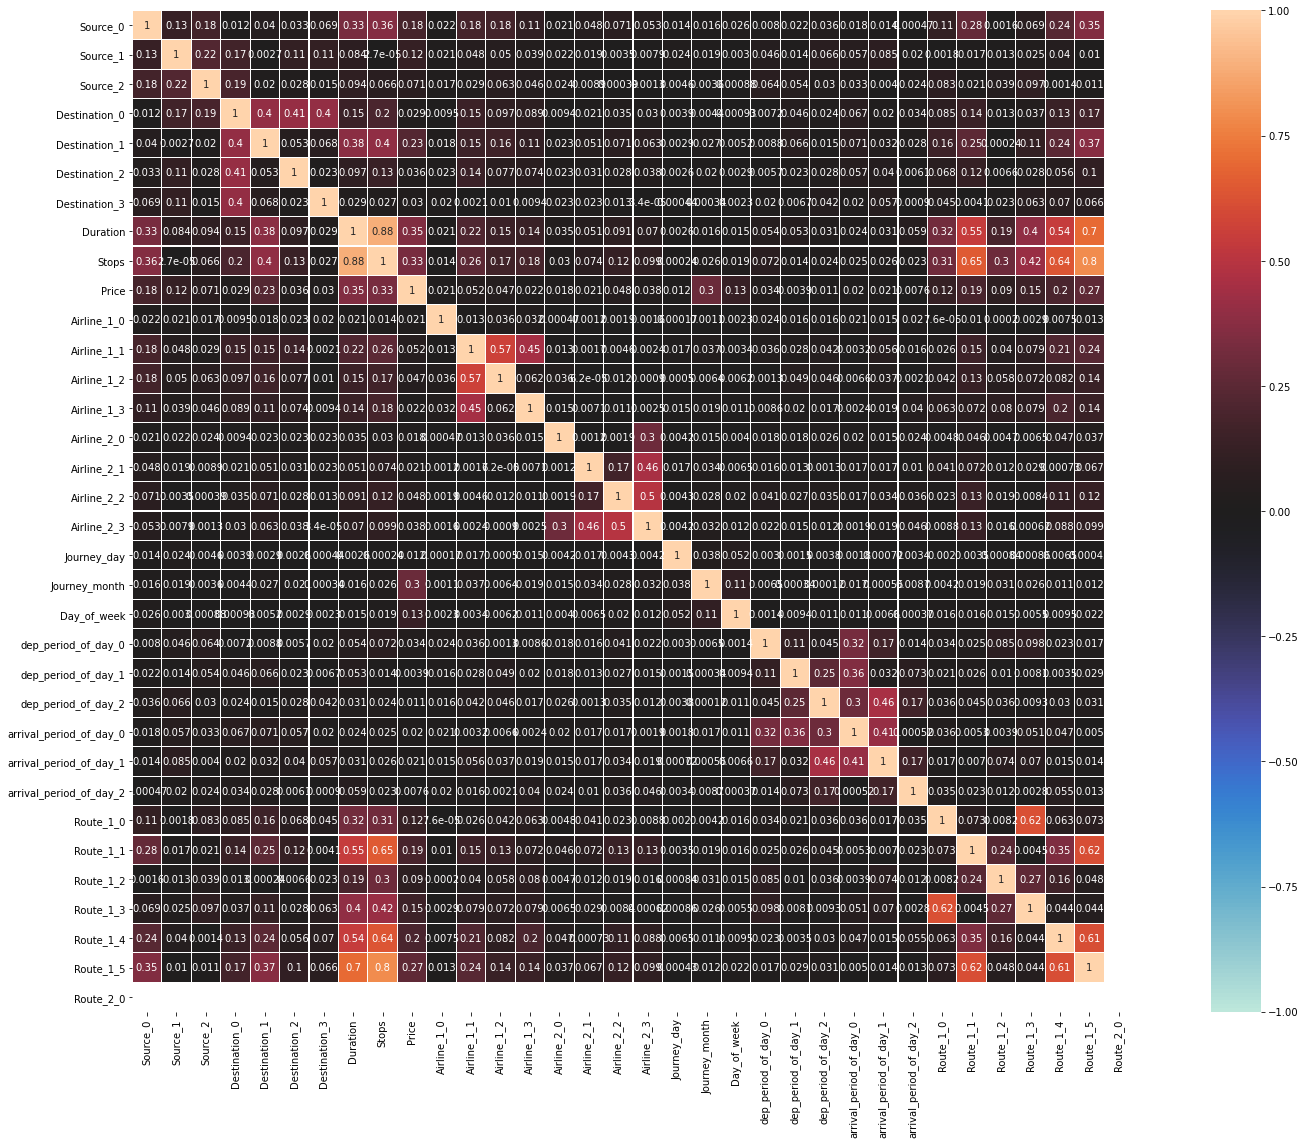

In [416]:
corr=df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(corr, vmin=-1,vmax=1, annot=True,
            square=True, center=0, fmt='.2g',linewidths=.1)
plt.tight_layout()

The feature Duration and Stops are strongly corelated which is kind of obvious as duration will be more for flights which are not non-stop

In [417]:
X = df.drop('Price', axis=1)
y = df['Price']

In [418]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [420]:
models = [['LinearRegression : ', LinearRegression()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['AdaBoostRegressor : ', AdaBoostRegressor()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()]]

In [421]:
for name, model in models:
    model=model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

LinearRegression :  1615.6509495591856
Lasso :  1615.453634342463
Ridge :  1615.6452435865726
KNeighborsRegressor :  973.2483038934503
DecisionTreeRegressor :  704.1253802261747
RandomForestRegressor :  538.5069218243518
AdaBoostRegressor :  1390.1105694363087
GradientBoostingRegressor :  988.9697988610249


Decision Tree, Random Forest and Gradient Boost have performed better than other models. Lets tune the hyper paramwterers anch evaluate their performance.

In [422]:
algorithms = {
    'DecisionTreeRegressor' : {
        'model' : DecisionTreeRegressor(),
        'param' : {
            'max_depth' : [3,7,9,13,20,50],
            'min_samples_leaf' : [3,7,15,20,50,100],
            'min_samples_split' : [3,5,7,20,50,100],
        }
    },
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'param' : {
            'n_estimators' : [10,20,50,100, 300, 500],
            'max_depth' : [3, 7, 9, 13,20,50],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8,10,15,20]
        }
    },
    'GradientBoostingRegressor' : {
        'model' : GradientBoostingRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.30],
            'n_estimators' : [10,20,50,100,300, 500],
            'criterion' : ['friedman_mse', 'mse']
        }
    }
}

In [423]:
score = []

for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 10, n_jobs=-1, verbose=3)
    rs.fit(X_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [424]:
performance = pd.DataFrame(score, columns=['model', 'score', 'params'])
performance

,model,score,params
0,DecisionTreeRegressor,0.883380,"{'min_samples_split': 3, 'min_samples_leaf': 3..."
1,RandomForestRegressor,0.889769,"{'n_estimators': 500, 'min_samples_split': 2, ..."
2,GradientBoostingRegressor,0.831989,"{'n_estimators': 500, 'learning_rate': 0.5, 'c..."


The performance of Random Forest and Decision Tree is almost same. We will select Random Forest as our final model as it is combination of multiple decision trees.

In [425]:
performance['params'][1]

{'n_estimators': 500,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [426]:
final_model = RandomForestRegressor(n_estimators=500, min_samples_split=2, max_features='sqrt', max_depth=20)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print('RMSE of RandomForestRegressor : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE of RandomForestRegressor : 627.0790784974976


In [427]:
final_model.score(X_train, y_train), final_model.score(X_test, y_test)

(0.9742284986674582, 0.890677971624753)

In [428]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 388.60300049572146
RMSE: 627.0790784974976


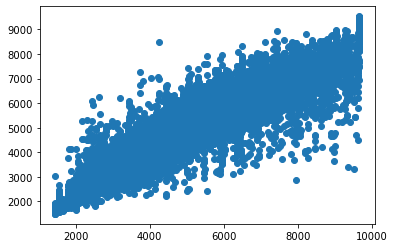

In [429]:
plt.scatter(y_test,y_pred)

Random Forest Regressor is selected as final model for prediction of flight price as its performance is better than any other model.

In [430]:
import pickle
with open ('FlightPricePrediction.sav','wb') as f:
    pickle.dump(final_model,f)